# CASTONE PROJECT 3

This Project is Part of Purwadhika Bootcamp DTI Data Analyst/Science

## Business Definition and Data Deep Dive

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_telco_customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


- `Dependents`: Whether the customer has dependents or not.
- `Tenure`: Number of months the customer has stayed with the company.
- `OnlineSecurity`: Whether the customer has online security or not.
- `OnlineBackup`: Whether the customer has online backup or not.
- `InternetService`: Whether the client is subscribed to Internet service.
- `DeviceProtection`: Whether the client has device protection or not.
- `TechSupport`: Whether the client has tech support or not
- `Contract`: Type of contract according to duration.
- `PaperlessBilling`: Bills issued in paperless form.
- `MonthlyCharges`: Amount of charge for service on monthly bases.
- `Churn`: Whether the customer churns or not.

--- The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

In [13]:
len(df)

4930

In [4]:
df.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [5]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


From this Describe we found 2 columns are Numerical and 9 are  Categorical, which is this dataset will have many "One Hot Encoding"

In [6]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [21]:
df.Dependents.value_counts(normalize=True)

Dependents
No     0.698986
Yes    0.301014
Name: proportion, dtype: float64

In [12]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

### EDA(Exploratory Data Analysis)

Data Visualization

In [ ]:
dependents_counts = df['Dependents'].value_counts().reset_index()
dependents_counts.columns = ['Dependents', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='Dependents', data=dependents_counts)
plt.title('Barplot Column Dependent')
plt.show()

ValueError: Could not interpret value `Churn` for `hue`. An entry with this name does not appear in `data`.

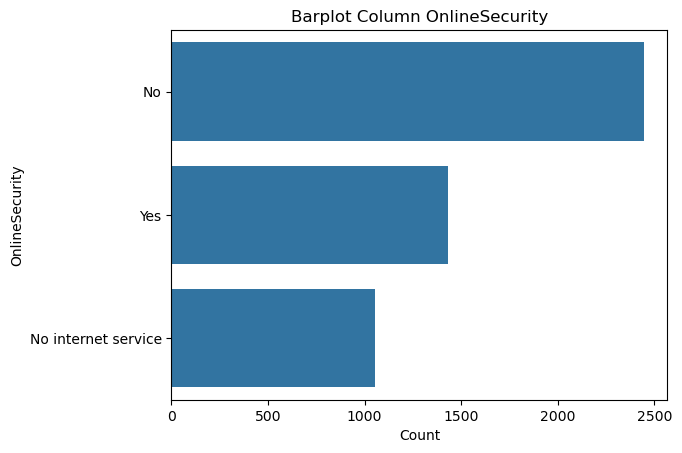

In [43]:
secure_counts = df['OnlineSecurity'].value_counts().reset_index()
secure_counts.columns = ['OnlineSecurity', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='OnlineSecurity', data=secure_counts)
plt.title('Barplot Column OnlineSecurity')
plt.show()

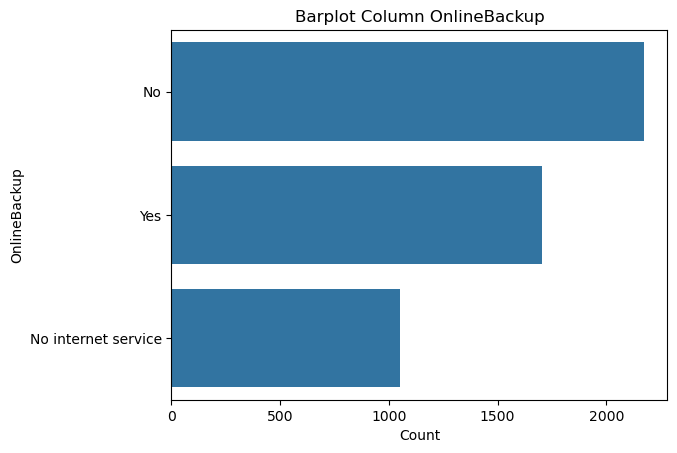

In [45]:
backup_counts = df['OnlineBackup'].value_counts().reset_index()
backup_counts.columns = ['OnlineBackup', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='OnlineBackup', data=backup_counts)
plt.title('Barplot Column OnlineBackup')
plt.show()

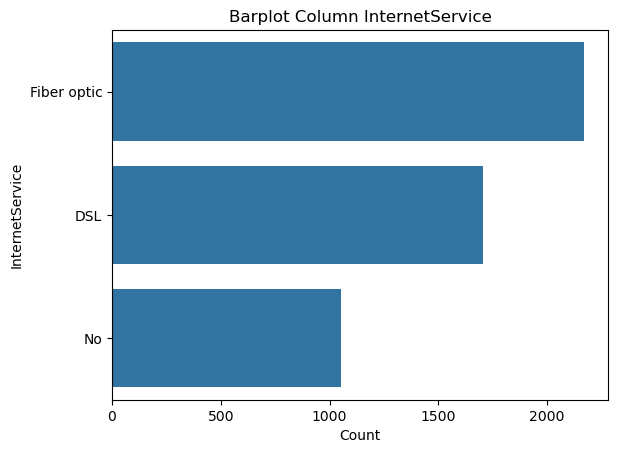

In [46]:
service_counts = df['InternetService'].value_counts().reset_index()
service_counts.columns = ['InternetService', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='InternetService', data=service_counts)
plt.title('Barplot Column InternetService')
plt.show()

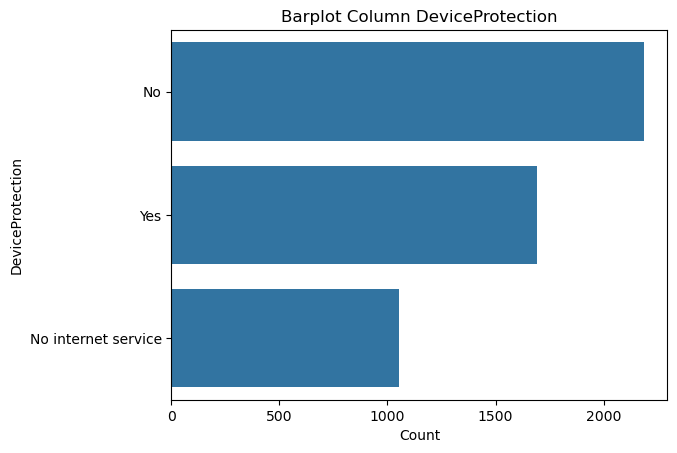

In [47]:
protect_counts = df['DeviceProtection'].value_counts().reset_index()
protect_counts.columns = ['DeviceProtection', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='DeviceProtection', data=protect_counts)
plt.title('Barplot Column DeviceProtection')
plt.show()

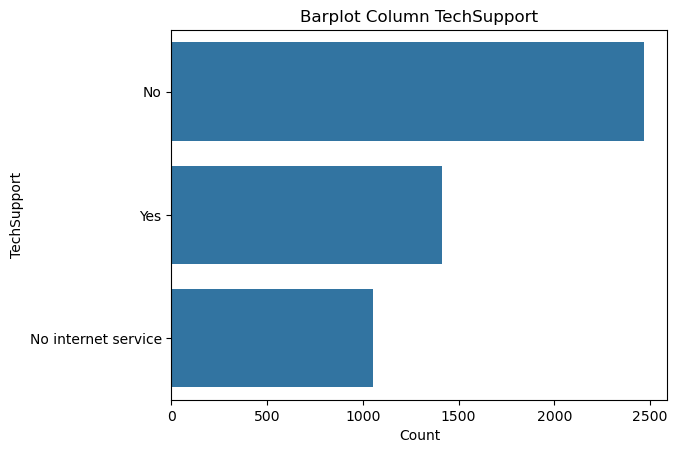

In [54]:
techsupp_counts = df['TechSupport'].value_counts().reset_index()
techsupp_counts.columns = ['TechSupport', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='TechSupport', data=techsupp_counts)
plt.title('Barplot Column TechSupport')
plt.show()

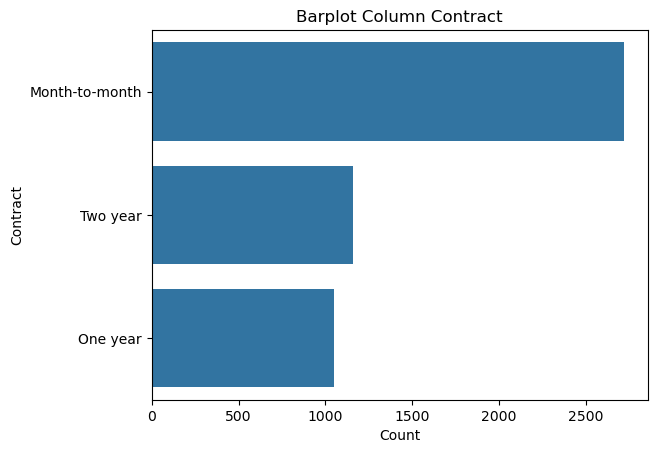

In [55]:
contract_counts = df['Contract'].value_counts().reset_index()
contract_counts.columns = ['Contract', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='Contract', data=contract_counts)
plt.title('Barplot Column Contract')
plt.show()

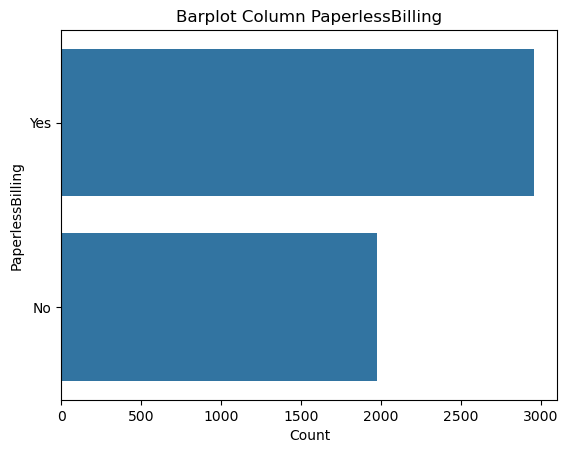

In [56]:
paperless_counts = df['PaperlessBilling'].value_counts().reset_index()
paperless_counts.columns = ['PaperlessBilling', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='PaperlessBilling', data=paperless_counts)
plt.title('Barplot Column PaperlessBilling')
plt.show()

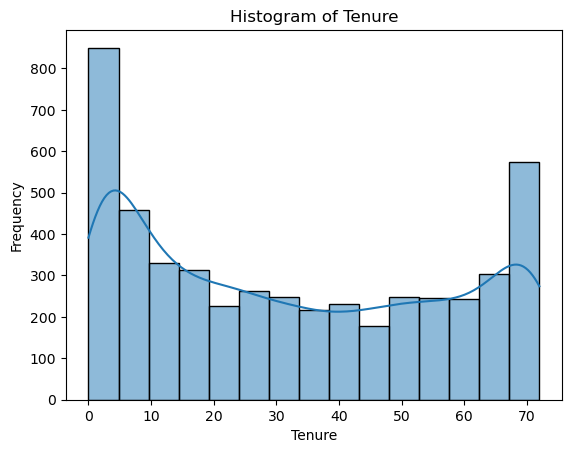

In [62]:
sns.histplot(df['tenure'], bins=15, kde=True)  # Set kde=True to add a density curve
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.show()

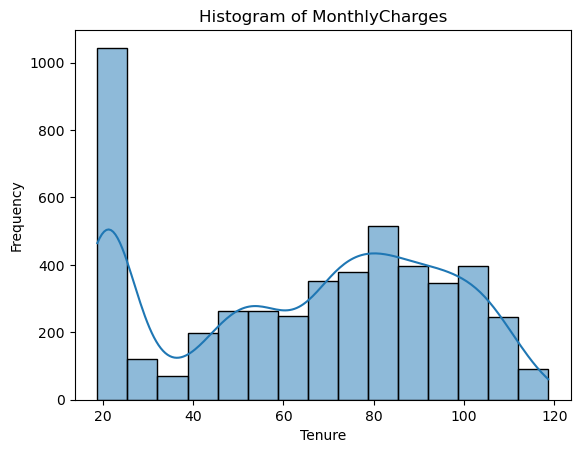

In [63]:
sns.histplot(df['MonthlyCharges'], bins=15, kde=True)  # Set kde=True to add a density curve
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of MonthlyCharges')
plt.show()

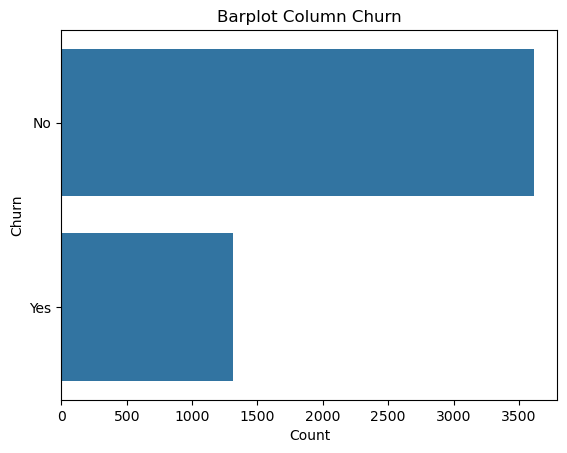

In [59]:
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Create a horizontal bar plot
sns.barplot(x='Count', y='Churn', data=churn_counts)
plt.title('Barplot Column Churn')
plt.show()

## Data PreProcessing

### Data Cleaning

### Feature Engineering

### Data Scaling

## Declaration Model

### Splitting Data

## Training Model

## Evaluation

## Optimation and Tuning

### Hyperparameter Tuning

### Feature Selection

## Deployment

### Export Model (PKL)